# 5. Frequency Domain

Curso - **Visión computacional para imágenes y video**

Grupo 10

Equipo 58:

Carlos Alberto Ochoa Gonzáles - A01746583

Carlos Daniel Morales Torres - A0179068

Iván Nava Cardeño - A01361985

Natalia Nevarez Tinoco - A01566204



---



Implementar los siguientes ejercicios:

a) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)


b) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasa altas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)



---

## Table of Contents
1. [Libraries](#libraries)
2. [Fast Fourier Transform (FFT)](#fft)
3. [Low Pass Filter](#low)
4. [High Pass Filter](#high)
5. [Ejercicio a)](#a)
6. [Ejercicio b)](#b)
7. [Referencias](#ref)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Fast Fourier Transform (FFT) <a class="anchor" id="fft" ></a>

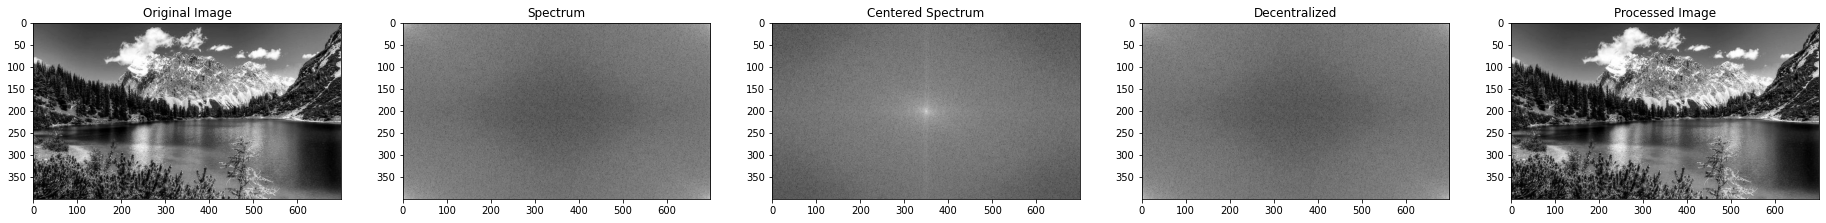

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/image.jpg", 0)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()

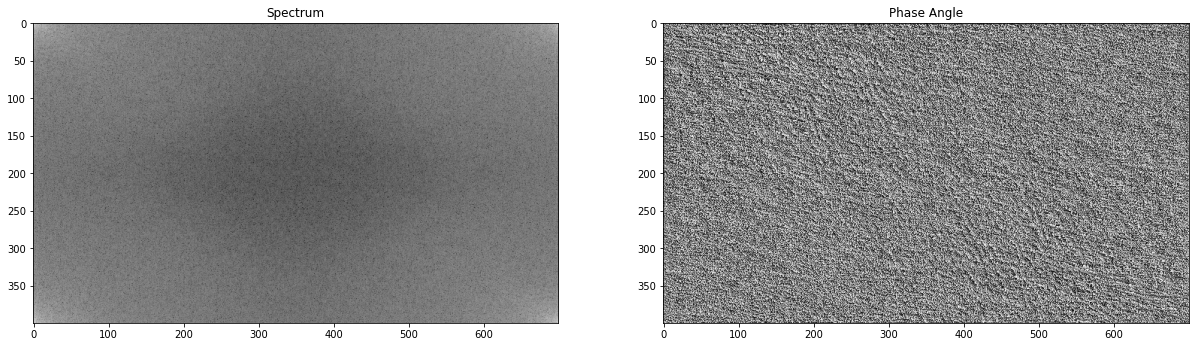

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/image.jpg", 0)

original = np.fft.fft2(img)
plt.subplot(131), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Spectrum")

plt.subplot(132), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

In [ ]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

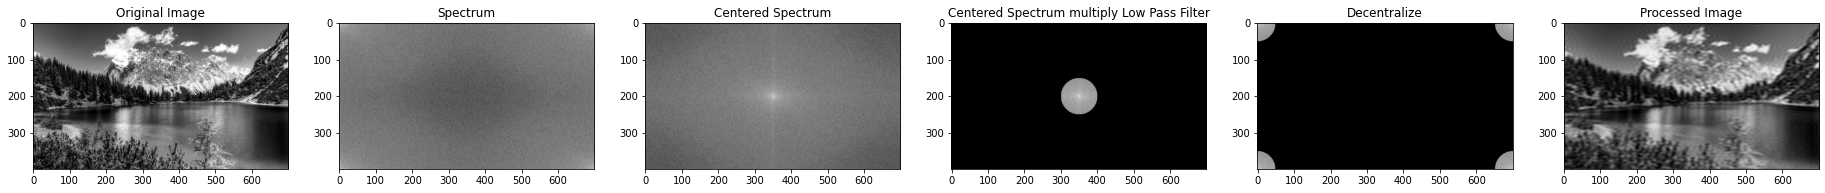

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/image.jpg", 0)
plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## Low Pass Filter <a class="anchor" id="low" ></a>

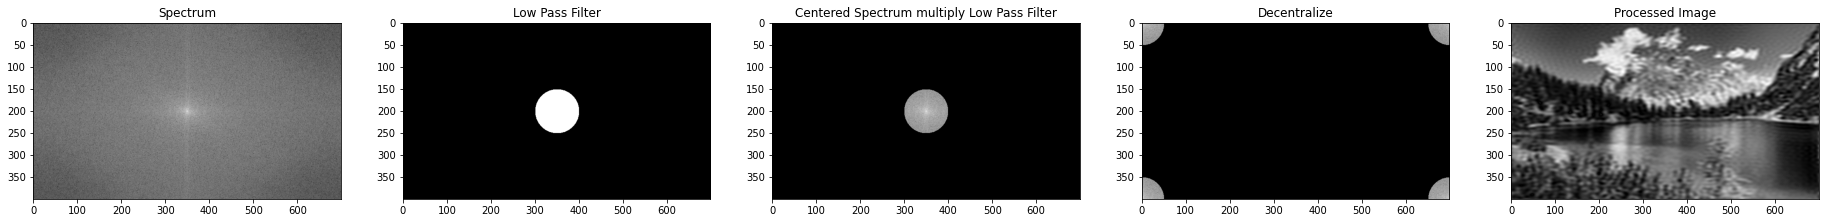

In [ ]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## High Pass Filter <a class="anchor" id="high" ></a>

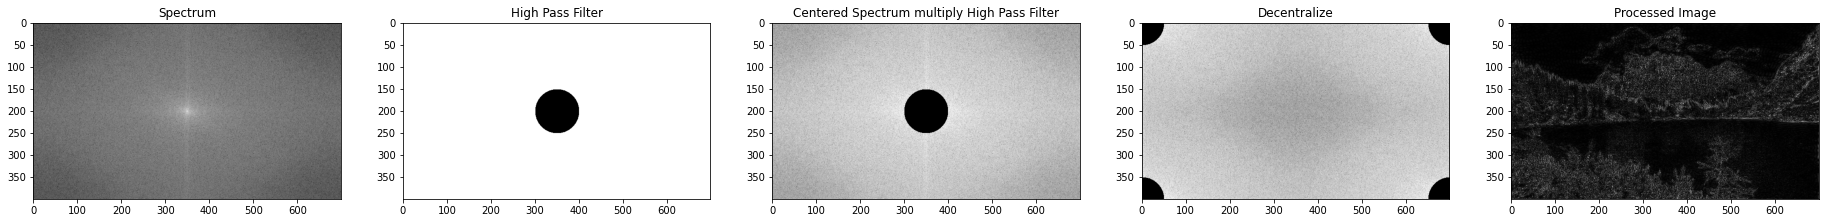

In [ ]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

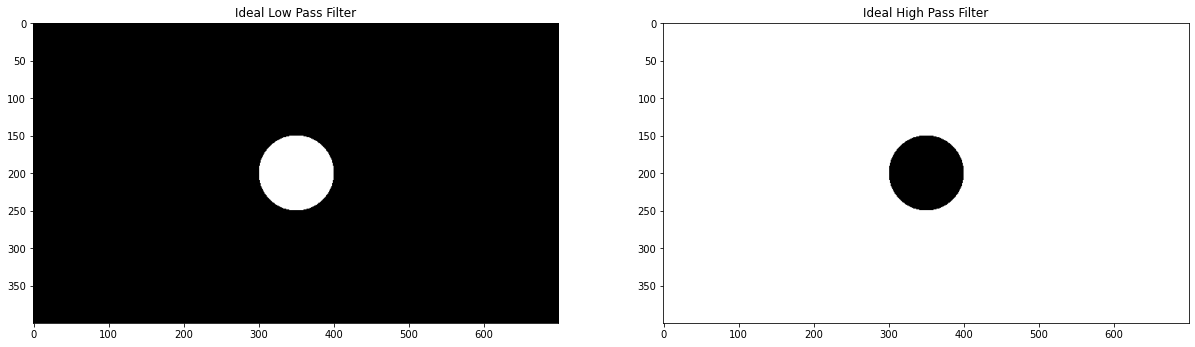

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Ideal Low Pass Filter")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Ideal High Pass Filter")

plt.show()

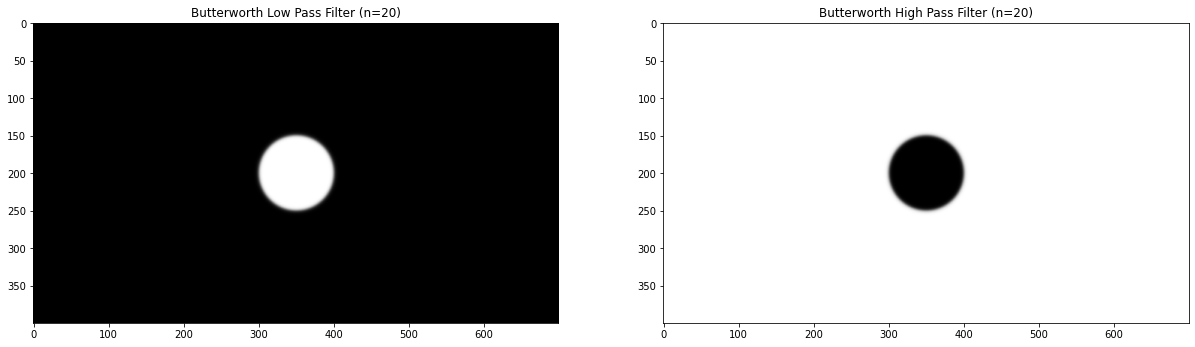

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,20)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=20)")

HighPass = butterworthHP(50,img.shape,20)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=20)")

plt.show()

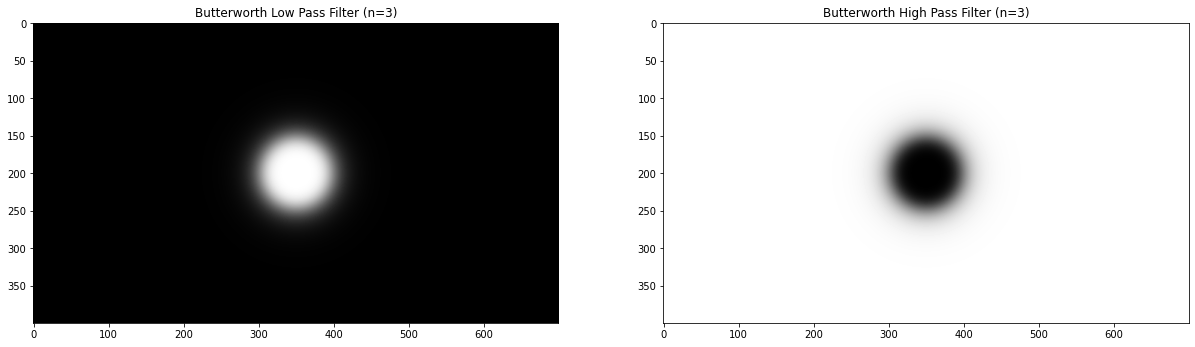

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,3)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=3)")

HighPass = butterworthHP(50,img.shape,3)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=3)")

plt.show()

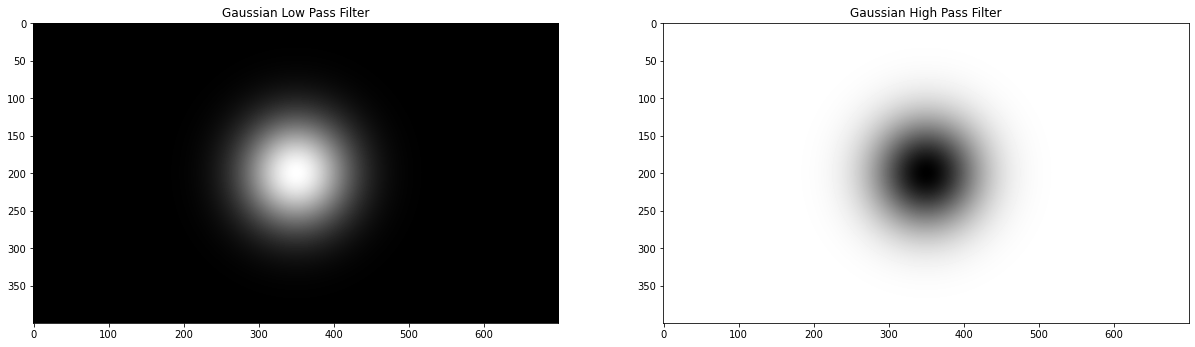

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = gaussianLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Gaussian Low Pass Filter")

HighPass = gaussianHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

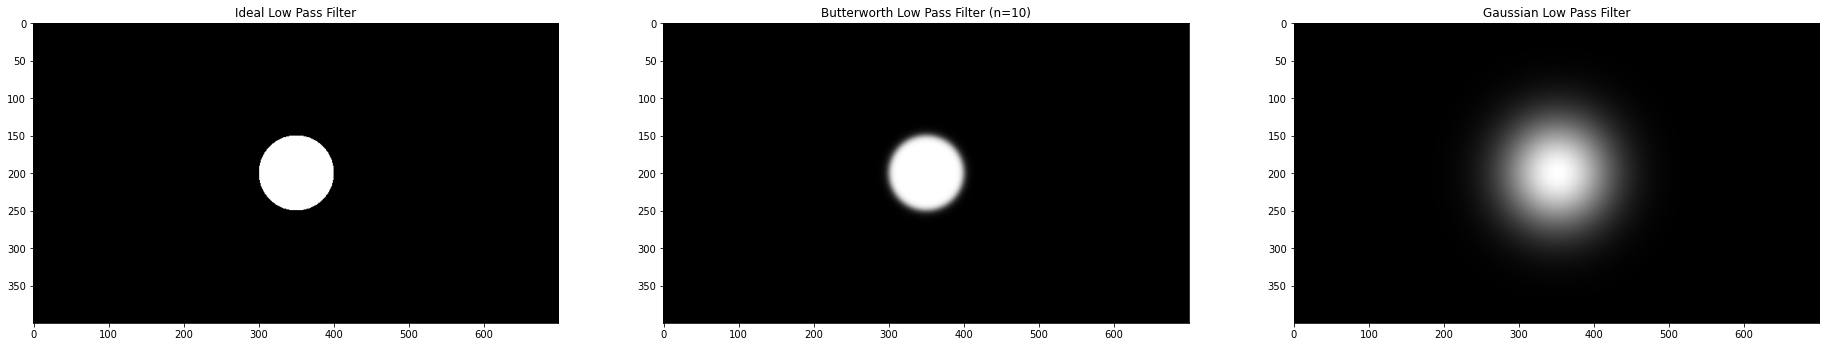

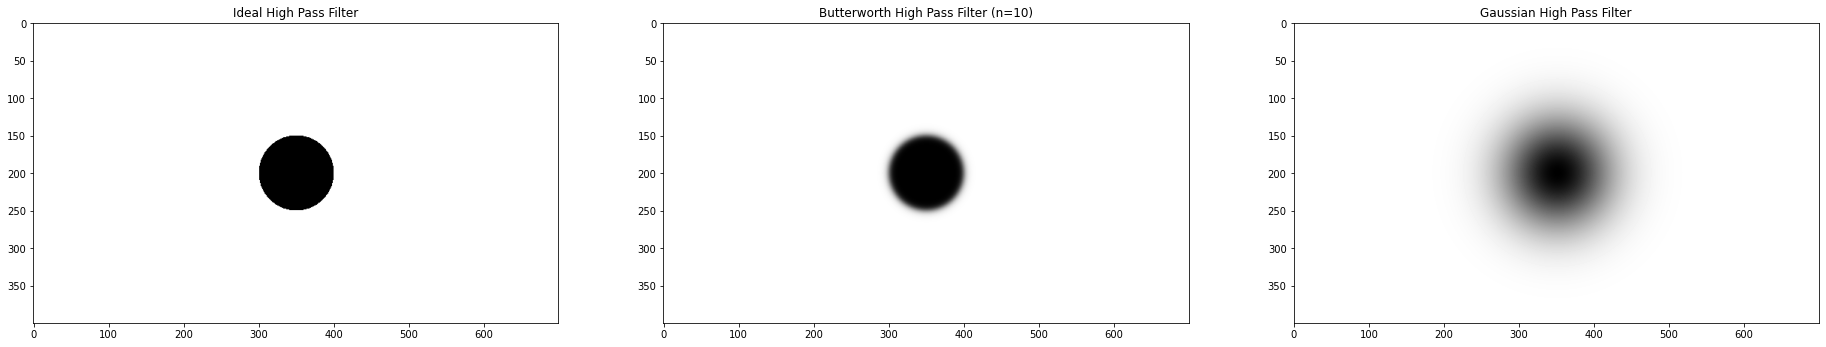

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

IdealLP = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(IdealLP, "gray"), plt.title("Ideal Low Pass Filter")

ButterLP = butterworthLP(50,img.shape,10)
plt.subplot(132), plt.imshow(ButterLP, "gray"), plt.title("Butterworth Low Pass Filter (n=10)")

GaussianLP = gaussianLP(50,img.shape)
plt.subplot(133), plt.imshow(GaussianLP, "gray"), plt.title("Gaussian Low Pass Filter")

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
IdealHP = idealFilterHP(50,img.shape)
plt.subplot(231), plt.imshow(IdealHP, "gray"), plt.title("Ideal High Pass Filter")

ButterHP = butterworthHP(50,img.shape,10)
plt.subplot(232), plt.imshow(ButterHP, "gray"), plt.title("Butterworth High Pass Filter (n=10)")

GaussianHP = gaussianHP(50,img.shape)
plt.subplot(233), plt.imshow(GaussianHP, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

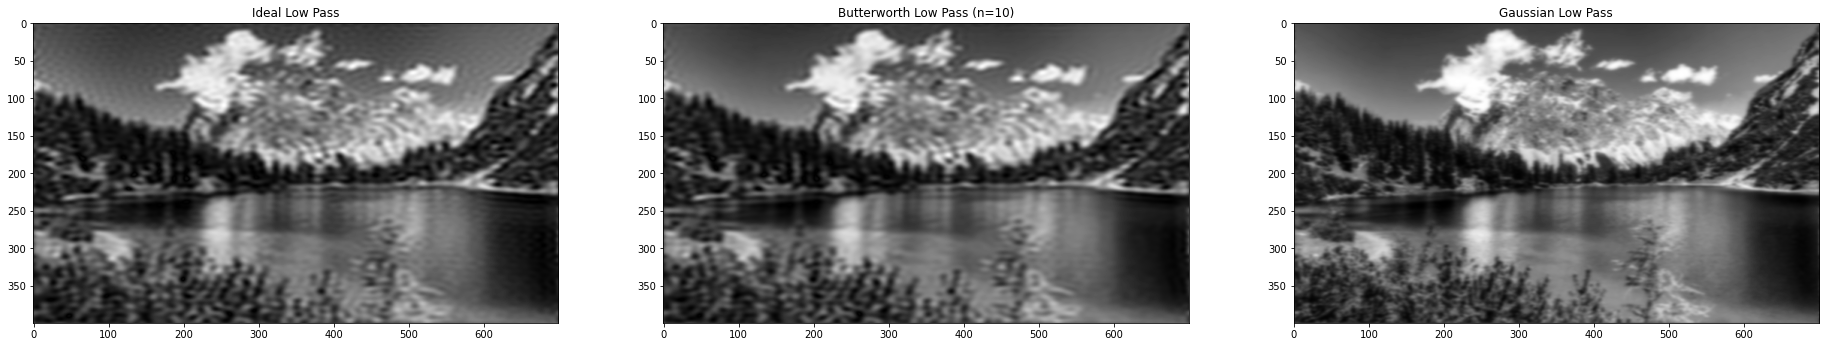

In [ ]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")

LowPassCenter = center * butterworthLP(50,img.shape,10)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (n=10)")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

plt.show()

In [ ]:
img = cv2.imread("left01.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(131), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

HighPassCenter = center * butterworthHP(50,img.shape,10)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (n=10)")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

IndexError: cannot do a non-empty take from an empty axes.

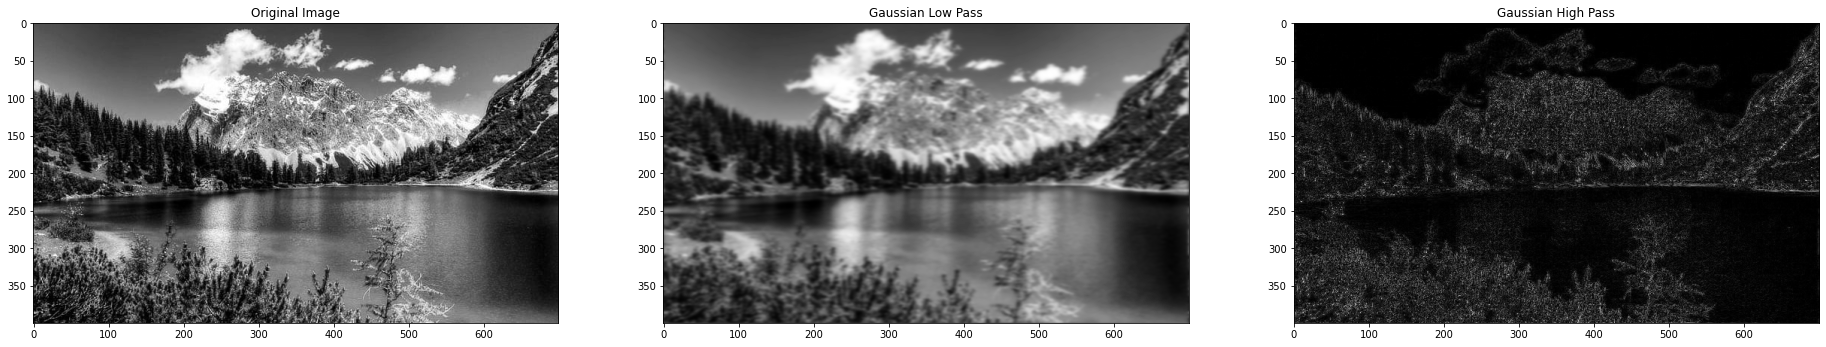

In [ ]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

## Ejercicio a)

Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)

**Image Transformation via Fourier Transform and Low Pass Filter**

### Introduction

Digital images can be processed not only in the spatial domain (pixel intensity manipulations) buy also in the frequency domain by analyzing and modifying their frequency components. The **Discrete Fourier Transform (DFT)** is the mathematical tool that transforms an image from the spatial domain $f(x,y)$ into the frequency domain representation $F(u,v)$. Basically, the DFT represents an image as a sum of sinusoidal basis functions (complex exponentials) of varying frequencies, amplitudes, and phases. The 2D DFT of an $M\times N$ image is defined as:

$$
F(u,v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x,y)
\exp\left[-j 2 \pi \left( \frac{ux}{M} + \frac{vy}{N} \right)\right]
$$

for $u = 0,1,\dots, M-1$ and $v = 0,1,\dots,N-1$. The inverse DFT (IDFT) converts back to spatial domain and is given by a similar double sum with a $+j$ exponent and a normalization factor $1/(MN)$. This transformation is completely reversible, meaning no information is lost in the frequency domain representation.

In the frequency domain, and imag'es **sprectrum** $|F(u,v)|$ reveals how much information (variance) is presented at different spatial frequencies. Low frequencies (near the origin of $F(u,v)$) correspond to slowly-varying intensity regions (overall illumination or coarse structures), while high frequencies (far from the origin) correspond to rapid intensity changes such as edges, fine details, or noise. Crucially, **sharp edges and noise conribute significantly to high-frequency content**. This, to *smooth* or *blur* an image (reducing noise or small details), one can attenuate its high-frequency components - a process known as **low pass filtering**. On the other hand, to sharpen an image, one would attenuate low frequencies and emphazise highs (high pass filtering). The fundamental relation leveraged in frequency filtering is that convolution in the spatial domain corresponds to multiplication in the frequency domain. In formula form, if $G(u,v) = F(u,v),H(u,v)$ then $g(x,y) = f(x,y) * h(x,y)$, where $H(u,v)$ is a filter transfer function and $h(x,y)$ its spatial kernel (the inverse DFT of $H$). Thus, filtering can be performed by multiplying the image's DFT with a designed *filter function* $H(u,v)$ and then applying the IDFT to get the processed image:

1. Compute  
$$
F(u,v) = {F}\{f(x,y)\}
$$
the DFT of the input image \( f(x,y) \).


2. Multiply the spectrum by the frequency filter: $G(u,v) = H(u,v),F(u,v)$.

3. Compute $g(x,y) = {{F}^{-1}}{G(u,v)}$, the inverse DFT to obtain the filtered image $g(x,y)$.

This frequency domain filtering model is equivalent to convolving the image with the spatial impulse response $h(x,y)$ corresponding t $H(u,v)$. The advantage is that designing $H(u,v)$ to achieve a desired frequency effect (like removing high frequency noise) can be more straighforward than designing a spatial kernel directly.

Before applying frequency filters, it is common to **center the DFT** (using a shift) so that the origin (zero frequency DC component) is in the center of the spectrum for easier filter design and visualization. The distance of any frequency point $(u,v)$ from the center is defined as:

$$
D(u,v) = \sqrt{(u - M/2)^2 + (v - N/2)^2}
$$

for an $M\times N$ frequency grid. Here $(u,v)=(M/2, N/2)$ corresponds to the zero-frequency (DC) component at the center of the spectrum. This distance $D(u,v)$ will be used to define radial frequency filters that are frequency-selective based on how far a component is from the origin.

### Low-Pass Filters: Ideal, Butterworth, and Gaussian

A **low pass filter (LPF)** is one that allows low-frequency components to pass unchanged while attenuating or removing high frequency components. In image processing, low oas filtering produces a smoothing/blurring effect, useful for noise reduction and removing fine detail. There are three basic types of LPF commonly discussed: **Ideal, Butterworth, and Gaussian**. These three represent a spectrum of filter sharpness: from very sharp cutoff (ideal) to very smooth roll-off (Gaussian), with Butterworth in between and adjustable. Each filter is defined by a cutoff frequency (radius) $D_0$ that specifies the threshold between low and high frequencies, and each has a different transition behavior and mathematical form.

- Ideal Low Pass Filter (ILPF):

The ideal LPF has an abrupt, binary response in the frequency domain. It completely rejects (zeros out) all frequencies outside that circle. In other words, it is a "perfect" low pass in theory. Mathematically, the transfer function of an ideal low pass filter is defined as:

$$
H_{\text{ideal}}(u,v) =
\begin{cases}
1, & \text{if } D(u,v) \le D_0, \\
0, & \text{if } D(u,v) > D_0
\end{cases}
$$

where $D(u,v)$ is the distance from $(u,v)$ to the DFT center as defined above. All frequencies with $D \le D_0$ (i.e. low frequency components) are passed with gain 1, and those with $D > D_0$ (high frequency components beyond the cutoff) are completely suppressed. The **cutoff frequency** $D_0$ can be thought of as the radius of the passband circle in the frequency spectrum. Ideal filters have an extremely sharp transition at $D_0$: there is no gradual taper, it's a hard cutoff. While in theory it is simple, the ideal filter is *not physically realizable* with analog components and has some practical downsides. In the spatial domain, the impulse response corresponding to an ideal low pass is a sinc function extending infinitely (due to the abrupt truncation in frequency). This causes ringing artifacts (Gibbs phenomenon) in the filtered image, manifesting as oscillatory overshoot near sharp intensity transitions (edges). Thus, ideal low pass filtering often introduces noticeable **ringing around edges** because the sharp cutoff in frequency causes ripple in spatial domain. Despite these issues, ILPFs are useful for understanding the principles of frequency filtering and are often simulated in software to study filter behavior.

- Butterworth Low Pass Filter (BLPF):

The Butterworth filter provides a more gradual transition between the passband and stopband, controlled by an integer order $n$. Its frequency response is smooth and monotonic, avoiding the abrupt discontinuity of the ideal filter. The transfer function of a Butterworth low pass filter of order $n$ with cutoff redius $D_0$ is given by:

$$
H_{\text{Butterworth}}(u,v) =
\frac{1}{1 + \left( \frac{D(u,v)}{D_0} \right)^{2n}}
$$

where $n \ge 1$ is typically an integer controlling the filter;s sharpness. At the cutoff distance $D(u,v) = D_0$, this formula yields $H=1/2$, meaning the cutoff is defined at the **half power point** (the frequency where the filter's magnitude is $1/\sqrt{2}$ of its maximum, often considered the cutoff frequency). The Butterworth filter's frequency response shape gets steeper wuth higher order $n$: a first-order ($n=1$) Butterworth has a very gentle roll-off (almost exponentially like), while as $n \to\infty$, the Butterworth approach mimics the ideal filter's infinitely deep transition. n fact, for large $n$, $H_{\text{Butterworth}}(u,v)$ approaches a 0-1 step function like the ideal filter. For lower $n$, it behaves closer to a Gaussian filter (discussed next), with an even smoother transition. Butterworth filters therefore form a family bridging the extremes of ideal and Gaussian, allowing one to tune the trade-off between frequency sharpness and spatial ringing. Visual effect: Butterworth low-pass filtering produces blurring similar to ideal LPF but with fewer artifacts when using moderate orders. The transition band reduces the abrupt elimination of frequencies, so Butterworth filters typically introduce less ringing in the image than an ideal filter does. In fact, a Butterworth filter of order $n=1$ has no ringing in its spatial kernel (no negative side-lobes), and orders $n=2$ or $n=3$ tend to have only very mild, often imperceptible ringing. Only at higher orders does ringing become more pronounced, as the filter’s response becomes more abrupt (closer to ideal). Therefore, by choosing an appropriate order $n$, one can control the smoothness vs. sharpness of the filter: higher order yields a sharper cutoff (preserving more of the highest passband frequencies but risking more ringing), whereas lower order yields smoother attenuation of high frequencies (more gentle blurring with minimal artifacts). This flexibility makes the Butterworth filter a convenient compromise in many applications. For example, one can achieve near-ideal filtering effects with significantly less ringing by using a Butterworth filter with a moderately high order (instead of an ideal filter).

- Gaussian Low Pass Filter (GLPF):

The Gaussian low pass filter has a transfer function given by a Gaussian (bell-shaped) curve, which provides the smoothest possible roll-off and no abrupt cutoff frequency. The frequency response of a Gaussian LPF with cutoff parameter $D_0$ can be written as:

$$
H_{\text{Gaussian}}(u,v) =
\exp\left(
- \frac{[D(u,v)]^2}{2 D_0^2}
\right)
$$

Here $D_0$ can be interpreted such that when $D(u,v) = D_0$, the filter’s value drops to $e^{-1/2} \approx 0.607$ of its maximum (1.0). There is no sharp cutoff; instead, higher frequencies are progressively attenuated the further out from the center they are. A Gaussian filter multiplies the Fourier spectrum by a smooth Gaussian shape, which ensures both the frequency response and the spatial kernel are Gaussian (the Fourier transform of a Gaussian is another Gaussian). Consequently, the spatial domain counterpart of a GLPF is also a Gaussian function (which is finite and smooth), meaning the Gaussian filter has no ringing or overshoot in the spatial domain. This is a major advantage in situations where any kind of artifact is unacceptable. Gaussian low-pass filtering produces a very natural-looking blur without the oscillations or ripples that can occur with more abrupt filters. The trade-off is that the Gaussian does not have a true cutoff frequency – it never fully reaches zero, so some high-frequency components, however attenuated, are always retained. In practice, frequencies sufficiently beyond $D_0$ will be negligibly small. Visual effect: Among the three, Gaussian filtering tends to preserve the overall image appearance the best while still smoothing noise, because it weights frequencies rather than truncating them. It achieves slightly less blurring than an ideal filter of the same nominal cutoff, since it doesn’t remove all frequencies up to $D_0$ but only attenuates them. However, the absence of ringing means edges, though blurred, do not exhibit artificial ripples. In summary, the Gaussian LPF is often preferred for gentle image smoothing when one wants to avoid artifacts and is willing to accept a more gradual cutoff of high-frequency content. Indeed, studies have found Gaussian low-pass filtering yields lower distortion (higher PSNR) compared to ideal and Butterworth filters for the same cutoff, making it effective for denoising while preserving important image features.

To compare these filters: teh **ideal LPF** offers the sharpest frequency cutoff but causes the most spatial ringing; the **Butterworth LPF** allows a tunable transition with some compromise between sharpness and ringing; and the **Gaussian LPF** offers the smoothest attenuation with no ringing but no distinct cutoff. All three will blur an image and remove high-frequency detail, but their differences matter when considering artifacts and the extent of blur.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from PIL import Image

In [9]:
# Load a simple image (512x512 graysclae) and convert to float
image = data.camera() # Example image (camera man) fro skimage
image = img_as_float(image) # scale to [0,1] floating-point

# Compute the 2D DFT of the image and shift the zero-frequency component to center
F = np.fft.fft2(image)
F_shifted = np.fft.fftshift(F) # center the spectrum

# Define frequency grid
M, N = image.shape
u = np.arange(M) - M/2
v = np.arange(N) - N/2
V, U = np.meshgrid(u,v, indexing='ij') # coordinate matrices
D = np.sqrt(U**2 + V**2) # dinstance matrix D(u,v)

# Construct Low Pass filter transfer funstions
D0 = 50 # cutoff frequency radius (in pixels)
n = 2 # Butterworth filter order

# Ideal Low Pass Filter (ILPF)
H_ideal = np.where(D <= D0, 1, 0)

# Butterworth Low Pass Filter (BLPF)
H_butter = 1/ (1 + (D / D0)**(2 * n))

# Gaussian Low Pass Filter (GLPF)
H_gaussian = np.exp(-(D**2) / (2 * (D0**2)))

# Apply filters in the frequency domain
G_ideal = F_shifted * H_ideal
G_butter = F_shifted * H_butter
G_gaussian = F_shifted * H_gaussian

# Shift back and invert DFT to get filtered spatial domain images
g_ideal = np.fft.ifft2(np.fft.ifftshift(G_ideal))
g_butter = np.fft.ifft2(np.fft.ifftshift(G_butter))
g_gaussian = np.fft.ifft2(np.fft.ifftshift(G_gaussian))

# Take real part (imaginary parts are ~0) and clip values to [0,1] range
g_ideal = np.clip(np.real(g_ideal), 0, 1)
g_butter = np.clip(np.real(g_butter), 0, 1)
g_gaussian = np.clip(np.real(g_gaussian), 0, 1)

# Display original vs filtered images
titles = ['Original', 'Ideal LPF (D0=50)', f'Butterworth LPF (D0=50, n={n})', 'Gaussian LPF (D0=50)']
images = [image, g_ideal, g_butter, g_gaussian]

plt.figure(figsize=(8, 8))
for i, (img, title) in enumerate(zip(images, titles), start=1):
    plt.subplot(2, 2, i)
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    plt.title(title)
    plt.axis('off')
plt.suptitle("Figure 1: Comparison of Low-Pass Filters", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Discussion**

Figure 1: Frequency-domain low-pass filtering results. Top-left: original image (512×512, greyscale). Top-right: Ideal LPF result with $D_0=50$ (radius in frequency pixels). Bottom-left: Butterworth LPF result with $D_0=50$, order $n=2$. Bottom-right: Gaussian LPF result with $D_0=50$. All three filters produce a smoothing effect, but the ideal filter yields the strongest blur. By looking at the result carefully, one can observe faint ringing artifacts in the ideal filtered image (e.g. slight ripples near sharp edges), whereas the Butterworth (order 2) shows much less ringing, and the Gaussian shows essentially no ringing. The Gaussian and Butterworth filters preserve a bit more contrast at edges (for the same cutoff) compared to the ideal filter, which completely removes frequencies beyond 50 and thus blurs slightly more aggressively. Overall, Gaussian filtering provides the gentlest smoothing without artifacts, while the ideal filter gives the most pronounced blur with potential edge ringing.

The original image has fine details and sharp edges (e.g. the film camera and the background texture). After applying an ideal LPF with cutoff radius 50, the image is noticeably blurred: fine details like textures and edges are significantly smoothed out. The ideal filter, due to its abrupt cutoff, introduces minor ringing (observed as slight dark/bright halos near some edges). The Butterworth LPF (order 2, same cutoff) also blurs the image, but a bit less aggressively; some medium-frequency components are preserved due to the softer roll-off, so edges are a touch sharper compared to the ideal case. There is essentially no visible ringing for the Butterworth result at $n=2$. The Gaussian LPF yields a result very similar to Butterworth’s but with perhaps the least blurring of edges (since it attenuates rather than sharply cuts frequencies around the 50 radius threshold). As expected, the Gaussian result shows no ringing artifacts. This confirms the theoretical expectations: the ideal filter has the strongest frequency cutoff and thus causes the most blur and potential ringing, while the Gaussian filter produces the smoothest, most natural looking blur.

In [15]:
# Recreate Gonzalez & Woods Fig. 4.41-style panel with Ideal Low-Pass Filters (ILPF)
# - Uses mirror padding to avoid black borders (zero-padding artifacts)
# - Produces results for cutoff radii: 10, 30, 60, 160, 460
# - Computes % power removed for each filter (relative to padded spectrum power)
# - Arranges a 2x3 grid labeled (a)-(f): original + 5 ILPF results

# load image
path = '/content/drive/MyDrive/Colab Notebooks/MNA/Computer Vision/Semana5/Fig 4.41.png'
img = Image.open(path).convert("L")
f = np.asarray(img, dtype=np.float64) / 255.0  # normalize to [0,1]

M, N = f.shape

def mirror_pad(img):
    """Mirror-pad image to 2M x 2N as in DIP4E for frequency-domain filtering."""
    top = np.flipud(img)         # mirror vertically
    bottom = np.flipud(img)
    left = np.fliplr(img)        # mirror horizontally
    right = np.fliplr(img)

    # Build 2x2 tiling with flips to get mirror padding
    tl = np.flipud(np.fliplr(img))
    tr = np.flipud(img)
    bl = np.fliplr(img)
    br = img.copy()

    # Stack blocks
    top_row = np.hstack([tl, tr])
    bottom_row = np.hstack([bl, br])
    big = np.vstack([top_row, bottom_row])
    return big
def ilpf_on_padded(img, D0):
    """Apply Ideal Low-Pass Filter with cutoff D0 on 2M x 2N mirror-padded image.
       Returns cropped result (M x N) and percentage of power removed."""
    M, N = img.shape
    # FFT and shift
    F = np.fft.fft2(img)
    F_shift = np.fft.fftshift(F)

    # Frequency grid (centered)
    u = np.arange(M) - M/2
    v = np.arange(N) - N/2
    V, U = np.meshgrid(v, u)  # note: meshgrid swapped to align axes for numpy indexing
    D = np.sqrt(U**2 + V**2)

    # Ideal Low-Pass mask
    H = (D <= D0).astype(np.float64)

    # Power computations
    total_power = np.sum(np.abs(F_shift)**2)
    removed_power = np.sum(np.abs(F_shift)**2 * (1 - H))
    removed_pct = 100.0 * removed_power / total_power

    # Filtering
    G_shift = F_shift * H
    g_padded = np.fft.ifft2(np.fft.ifftshift(G_shift))
    g_padded = np.real(g_padded)

    # Crop lower-right quadrant (original image location)
    m, n = img.shape[0]//2, img.shape[1]//2
    g = g_padded[m:, n:]  # bottom-right quadrant is the original orientation
    # Normalize/clamp to [0,1]
    g = np.clip(g, 0, 1)
    return g, removed_pct

# Prepare padded image
f_pad = mirror_pad(f) # size 2M x 2N

# Radii (as in the book's example)
radii = [10,30,60,160,460]

results = []
powers = []
for D0 in radii:
  g, pct = ilpf_on_padded(f_pad, D0)
  results.append(g)
  powers.append(pct)

# Plot 2x3 grid similar to DIP Fig. 4.41
fig = plt.figure(figsize=(11, 7))

imgs = [f] + results
titles = ["(a) Original"] + [
    f"({chr(ord('b') + i)}) ILPF D0 = {radii[i]}" for i in range(len(radii))
]

for i, (img, title) in enumerate(zip(imgs, titles), start = 1):
  ax = plt.subplot(2, 3, i)
  ax.imshow(img, cmap='gray', vmin=0, vmax=1)
  ax.set_title(title, fontsize=10)
  ax.axis('off')

# Write subtitle
power_text = ", ".join([f"D0={r}: {p:.1f}%" for r, p in zip(radii, powers)])
plt.suptitle(
    "Ideal Low-Pass Filtering (mirror padding). Percent power removed — " + power_text,
    fontsize=12, y=0.98
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Gaussian Low Pass Filter (GLPF)**

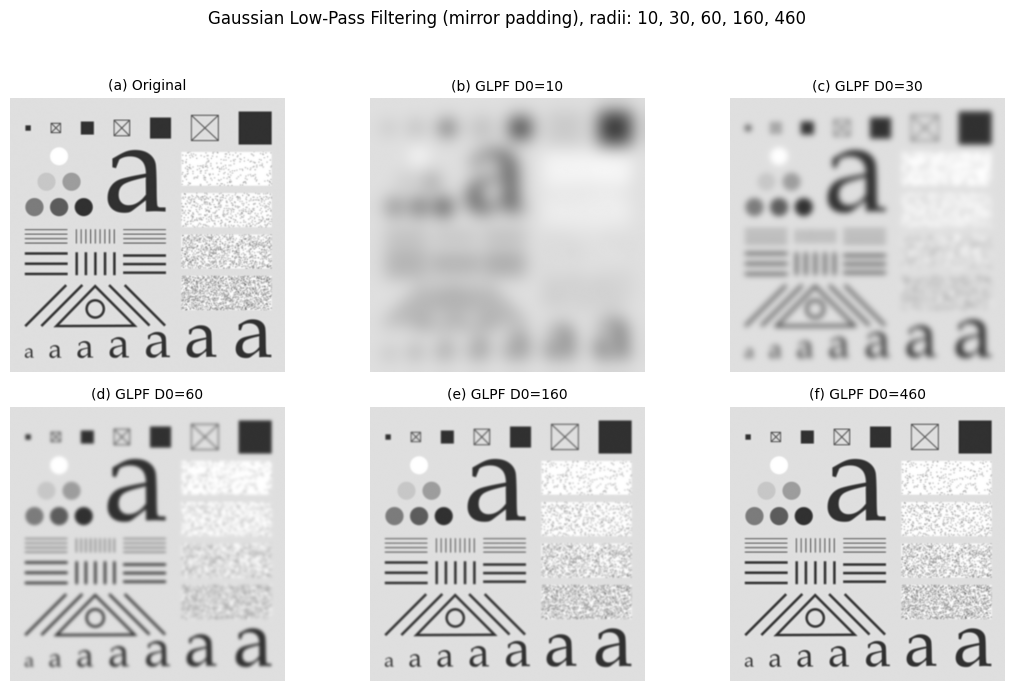

In [16]:
# Load image
path = '/content/drive/MyDrive/Colab Notebooks/MNA/Computer Vision/Semana5/Fig 4.41.png'
img = Image.open(path).convert("L")
f = np.asarray(img, dtype=np.float64) / 255.0
M, N = f.shape

def mirror_pad(img):
    tl = np.flipud(np.fliplr(img))
    tr = np.flipud(img)
    bl = np.fliplr(img)
    br = img
    return np.vstack([np.hstack([tl, tr]), np.hstack([bl, br])])

def glpf_on_padded(img_padded, D0):
    Mp, Np = img_padded.shape
    F = np.fft.fft2(img_padded)
    Fsh = np.fft.fftshift(F)
    u = np.arange(Mp) - Mp/2
    v = np.arange(Np) - Np/2
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    # Gaussian Low-Pass
    H = np.exp(-(D**2)/(2*(D0**2)))
    Gsh = Fsh * H
    g_pad = np.fft.ifft2(np.fft.ifftshift(Gsh)).real
    m, n = Mp//2, Np//2
    g = g_pad[m:, n:]
    return np.clip(g, 0, 1)

f_pad = mirror_pad(f)
radii = [10, 30, 60, 160, 460]
results = [glpf_on_padded(f_pad, r) for r in radii]

# Plot: 2x3 grid
fig = plt.figure(figsize=(11, 7))
imgs = [f] + results
titles = ["(a) Original"] + [f"({chr(ord('b')+i)}) GLPF D0={r}" for i, r in enumerate(radii)]

for i, (img, title) in enumerate(zip(imgs, titles), start=1):
    ax = plt.subplot(2, 3, i)
    ax.imshow(img, cmap="gray", vmin=0, vmax=1)
    ax.set_title(title, fontsize=10)
    ax.axis("off")

plt.suptitle("Gaussian Low-Pass Filtering (mirror padding), radii: " +
             ", ".join(map(str, radii)),
             fontsize=12, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



In [17]:
# Butterworth Low-Pass Filter (BLPF) panel, mirroring DIP4E Fig. 4.46
# - Mirror padding to avoid zero-padding borders
# - Cutoff radii: 10, 30, 60, 160, 460
# - Filter order n = 2.25 (non-integer allowed)
# - Layout: 2x3 grid (a) Original, (b)-(f) BLPF outputs

In [ ]:
# Load image
orig_path = "/content/drive/MyDrive/Colab Notebooks/MNA/Computer Vision/Semana5/Fig 4.41.png"
img = Image.open(orig_path).convert("L")
f = np.asarray(img, dtype=np.float64) / 255.0

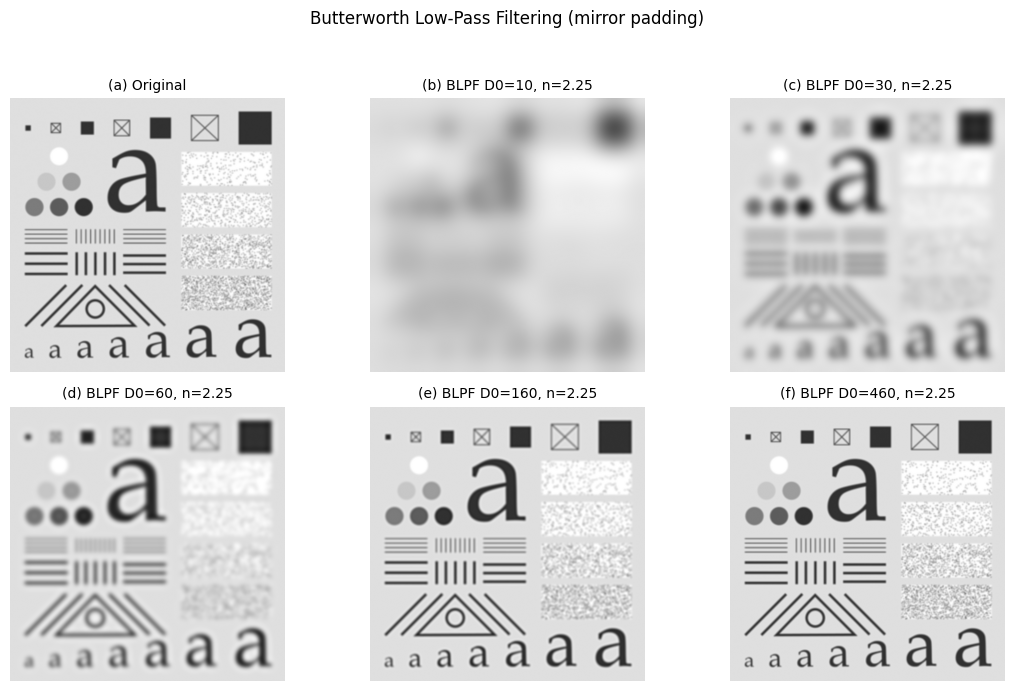

In [18]:
def mirror_pad(img):
    tl = np.flipud(np.fliplr(img))
    tr = np.flipud(img)
    bl = np.fliplr(img)
    br = img
    return np.vstack([np.hstack([tl, tr]), np.hstack([bl, br])])

def blpf_on_padded(img_padded, D0, n=2.25):
    Mp, Np = img_padded.shape
    F = np.fft.fft2(img_padded)
    Fsh = np.fft.fftshift(F)
    u = np.arange(Mp) - Mp/2
    v = np.arange(Np) - Np/2
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    # Butterworth Low-Pass (allow real-valued order)
    H = 1.0 / (1.0 + (D / D0)**(2.0 * n))
    Gsh = Fsh * H
    g_pad = np.fft.ifft2(np.fft.ifftshift(Gsh)).real
    m, n_half = Mp//2, Np//2
    g = g_pad[m:, n_half:]
    return np.clip(g, 0, 1)

f_pad = mirror_pad(f)
radii = [10, 30, 60, 160, 460]
order = 2.25
results = [blpf_on_padded(f_pad, r, n=order) for r in radii]

# Plot grid
fig = plt.figure(figsize=(11, 7))
imgs = [f] + results
titles = ["(a) Original"] + [f"({chr(ord('b')+i)}) BLPF D0={r}, n={order}" for i, r in enumerate(radii)]

for i, (img, title) in enumerate(zip(imgs, titles), start=1):
    ax = plt.subplot(2, 3, i)
    ax.imshow(img, cmap="gray", vmin=0, vmax=1)
    ax.set_title(title, fontsize=10)
    ax.axis("off")

plt.suptitle("Butterworth Low-Pass Filtering (mirror padding)", fontsize=12, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


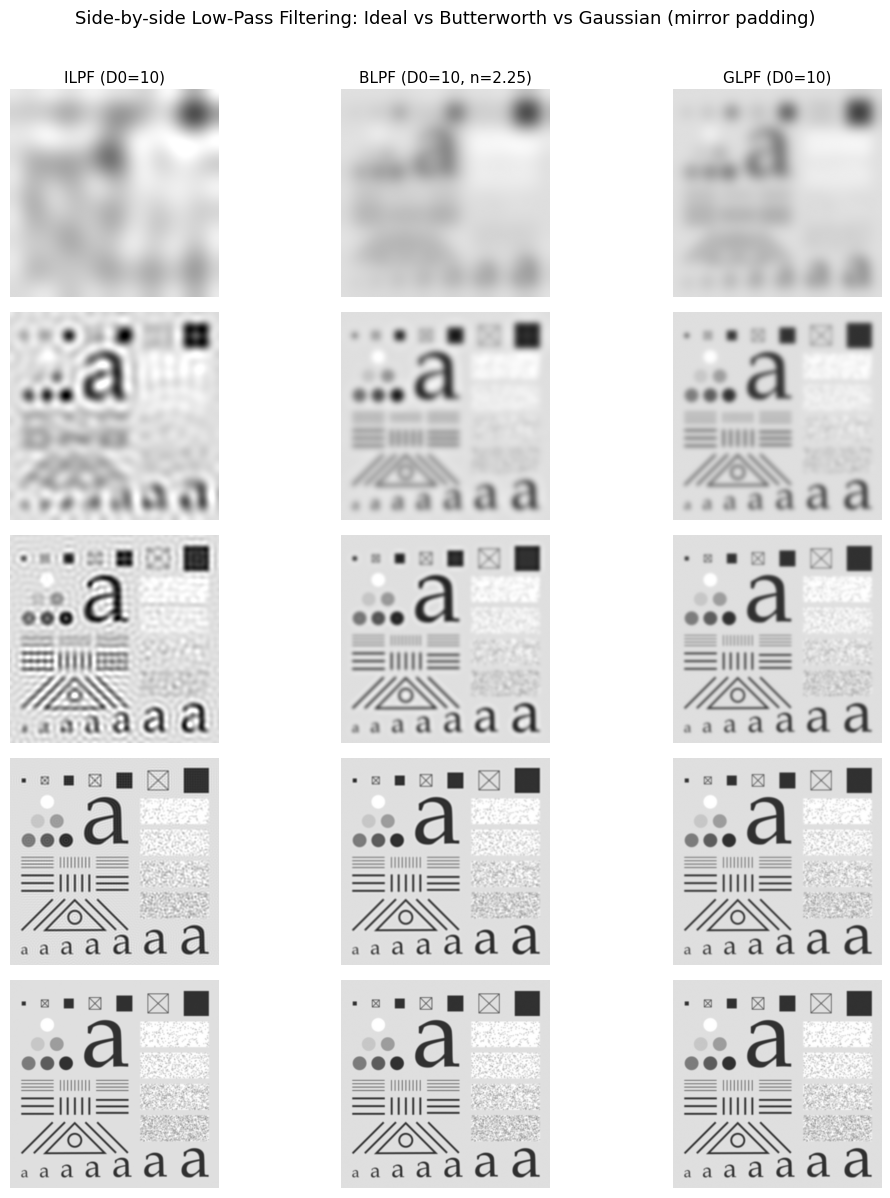

In [20]:
# Side-by-side comparison figure: ILPF vs BLPF vs GLPF
# - Mirror padding to avoid border artifacts
# - Rows for radii: 10, 30, 60, 160, 460
# - Columns: Ideal, Butterworth (n=2.25), Gaussian
# - Saves a single large figure suitable for reports

# Load image
orig_path = "/content/drive/MyDrive/Colab Notebooks/MNA/Computer Vision/Semana5/Fig 4.41.png"
img = Image.open(orig_path).convert("L")
f = np.asarray(img, dtype=np.float64) / 255.0

def mirror_pad(img):
    tl = np.flipud(np.fliplr(img))
    tr = np.flipud(img)
    bl = np.fliplr(img)
    br = img
    return np.vstack([np.hstack([tl, tr]), np.hstack([bl, br])])

def ilpf_on_padded(img_padded, D0):
    Mp, Np = img_padded.shape
    F = np.fft.fft2(img_padded)
    Fsh = np.fft.fftshift(F)
    u = np.arange(Mp) - Mp/2
    v = np.arange(Np) - Np/2
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    H = (D <= D0).astype(np.float64)
    Gsh = Fsh * H
    g_pad = np.fft.ifft2(np.fft.ifftshift(Gsh)).real
    m, n = Mp//2, Np//2
    return np.clip(g_pad[m:, n:], 0, 1)

def blpf_on_padded(img_padded, D0, n=2.25):
    Mp, Np = img_padded.shape
    F = np.fft.fft2(img_padded)
    Fsh = np.fft.fftshift(F)
    u = np.arange(Mp) - Mp/2
    v = np.arange(Np) - Np/2
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    H = 1.0 / (1.0 + (D / D0)**(2.0 * n))
    Gsh = Fsh * H
    g_pad = np.fft.ifft2(np.fft.ifftshift(Gsh)).real
    m, n2 = Mp//2, Np//2
    return np.clip(g_pad[m:, n2:], 0, 1)

def glpf_on_padded(img_padded, D0):
    Mp, Np = img_padded.shape
    F = np.fft.fft2(img_padded)
    Fsh = np.fft.fftshift(F)
    u = np.arange(Mp) - Mp/2
    v = np.arange(Np) - Np/2
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    H = np.exp(-(D**2)/(2*(D0**2)))
    Gsh = Fsh * H
    g_pad = np.fft.ifft2(np.fft.ifftshift(Gsh)).real
    m, n = Mp//2, Np//2
    return np.clip(g_pad[m:, n:], 0, 1)

# Prepare padded image once
f_pad = mirror_pad(f)

radii = [10, 30, 60, 160, 460]
order = 2.25

# Build figure
fig, axes = plt.subplots(len(radii), 3, figsize=(11, 12))
for r_idx, D0 in enumerate(radii):
    ilpf_img = ilpf_on_padded(f_pad, D0)
    blpf_img = blpf_on_padded(f_pad, D0, n=order)
    glpf_img = glpf_on_padded(f_pad, D0)

    row_imgs = [ilpf_img, blpf_img, glpf_img]
    col_titles = [f"ILPF (D0={D0})",
                  f"BLPF (D0={D0}, n={order})",
                  f"GLPF (D0={D0})"]

    for c in range(3):
        ax = axes[r_idx, c]
        ax.imshow(row_imgs[c], cmap="gray", vmin=0, vmax=1)
        if r_idx == 0:
            ax.set_title(col_titles[c], fontsize=11)
        ax.axis("off")

plt.suptitle("Side-by-side Low-Pass Filtering: Ideal vs Butterworth vs Gaussian (mirror padding)",
             fontsize=13, y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.985])
plt.show()

**Discussion**

Across all cut-off radii, reducing $𝐷_0$ increases smoothing because more high-frequency content is removed; raising $𝐷_0$ preserves detail. The Ideal LPF (ILPF) applies the sharpest frequency cutoff and therefore produces the strongest blur for a given $𝐷_0$, but it also introduces the most ringing (haloing) around edges due to its brick wall transition. The Butterworth LPF (BLPF, $𝑛 ≈ 2$) behaves between the other two: it suppresses high frequencies more firmly than Gaussian while keeping a smooth transition that largely avoids ringing; increasing the order would sharpen the cutoff but raise ringing risk. The Gaussian LPF (GLPF) yields the gentlest, most natural blur with essentially no ringing, preserving edge contrast better at the same $𝐷_0$ though without a strict cutoff. At very low radii (e.g., 10–30) all filters blur heavily, with GLPF retaining silhouettes slightly better; around mid radii (≈60) GLPF and low-order BLPF offer a good balance of denoising and detail; at high radii (≥160) the three results converge, with ILPF still most prone to subtle halos. Practically, choose GLPF when artifact free smoothing is paramount, BLPF (low order) when a somewhat tighter roll-off is desired without visible halos, and ILPF mainly for didactic or strict band limiting use cases; mirror padding helps ensure these judgments aren’t confounded by border artifacts.

## Ejercicio b)

Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasa altas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)

### Frequency Domain Highpass Filter

**Theory**

As we mentioned before, digital image can be done in either the spatial domain (via convolution with a kernel) or the frequency domain (by modifying the image's Fourier spectrum). The key link is the **Fourier transform**: convolution in space is equivalent to mulriplication in the frequency domain. In practice, spatial domain filtering (e.g. using a blur kernel) can be easier to understand, whereas frequency domain filtering (multiplying the Fourier coefficients by a transfer function) is often much faster for large images. Frequency domain design can also be more intuitive: different frequency bands correspond to image features (slow variations are low frequencies; edges and fine detail are high frequencies). For example, attenuating high frequencies blurs an image, while emphasizing high frequencies enhances edges.

**Purpose of High Pass Filtering**

High pass filtering is used to sharpen images by emphasizing edges and fine details. Edges and sharp transitions have strong high frequency components, so a high pass filter (keeps) these and attenuates the smooth low frequency parts. Basically, a high pass filter substracts out the "average" intensity, engancing contrast at transitions. This is commonly used in detail enhancement, texture enhancement, medical imaging (e.g. enhancing bone edges in X-rays), fingerprint or character enhancement, and any application requiring emphasis of image structure. In the frequency domain, a high pass filter transder function $H_{HP}(u,v)$ is simply $1 - H_{LP}(u,v)$, where $H_{LP}$ is a low-pass filter. Thus, applying a high-pass filter is as simple as transforming the image, multiplying by $H_{HP}(u,v)$, and transforming back.

**Ideal Highpass Filter (IHPF)**

- Formula

$$
H_{HP}(u,v) =
\begin{cases}
0, & D(u,v) \le D_0, \\
1, & D(u,v) > D_0,
\end{cases}
$$

where  

$$
D(u,v) = \sqrt{(u - u_0)^2 + (v - v_0)^2}.
$$

- Frequency Response

This is a "brick-wall" or a rectangular disc filter; it completely removes (sets to zero) all frequencies within $D_0$ and fully passes all frequencies. The transition from passband to stopband is perfectly sharp at $D_0$.

- Characteristics
The IHPF gives the **maximum sharpness** in the passband and stopband, with no gradual roll-off. In theory, it yields the strongest edge enhancement. However, its abrupt cutoff induces several spatial artifacts. Because an ideal filter in frequency corresponds to a non casual sinc like kernel in space, the result exhibits *ringing* (oscillatory overshoots) around edges. As Gonzalez & Woods mentioned, "the ideal highpass filter produces results with severe distortions caused by ringing. For example, the blotches inside the strokes of the letter 'a' are ringing artifacts".

- Artifacts/Risk

IHPFs notoriously produce Gibbs phenomenon ringing in the output image. In prcatice this can appear as dark or bright halos around edges. For this reason, ideal high pass filters are mostly theoretical models; they are rarely used in practical processing. (They do preserve frequencies sharply; but the cost in ringing usually outweights the benefit).

- Use cases

The IHPF is mainly used for analysis or demonstration. It is not typically chosen for real applications where ringing must be avoided. It serves as an extreme reference when comparing smoother filters.

**Butterworth Highpass Filter (BHPF)**

- Formula

A Butterworth high pass filter of order $n$ and cutoff $D_0$ is given by:

$$
H_{HP}(u,v) = \frac{1}{1 + \left( \frac{D_0}{D(u,v)} \right)^{2n}}
$$

Here $n$ controls the sharpness of the transition. For $n=1,2,\dots$, hifher order yields a steeper transition.

- Frequency Response

The Butterworth HPF provides a smooth, monotonic roll-off around the cutoff. Its magnitud reponse rises from 0 at $D=0$ to 1 as $D\to∞$, with a continuous slope at $D=D_0$. For small $n$ the transition is very gradual (almost Gaussian like); as $n\to∞$ it approaches the ideal (step) response. In other words, Butterworth filters form a continuum between Gaussian and ideal shapes. The 3D frequency response is dome shaped with less oscillationthan ideal. (Figure 4.51 in Gonzalez-Woods shows BHPF of different orders, illustrating this intermediate behavior.)

- Characteristics

Butterworth HPFs strike a compromise. Lower order Butterworth (small $n$) yields a gentle cutoff (hence minimal artifacts but less aggressive enhancement), whereas higher order Butterworth sharpens the cutoff (more edge enhancement) but at some cost of ringing. Notably, a moderatly high order ($n=4$) produces a *sharp yet smooth cutoff*. For example, Gonzalez & Woods report that a 4th order Butterworth HPF (cutoff $D_0=50$) provides a "sharp (but smooth) transition from low to high frequencies", effectively enhancing features like fingerprint ridges while suppressing broad smudges.

- Spatial Behavior

The correspondong spatial kernel of a Butterworth HPF is oscillatory but less so than the ideal kernel. It decays faster than the ideal sinc and has smaller side-lobes. Thus, ringing artifacts are milder than with IHPF. As order increases, the kernel's oscillations grow (eventually approaching the ideal's oscillations), so there is a trade-off with $n$. Usually, orders 2-3 provide a good balance (significant sharpening with torable ringing).

- Applications

Butterworth HPFs are used when one needs adjustable sharpness. The designer can choose $n$ to control the edge enhancement vs artifact trade-off. They are common in image and signal processing tasks where some ringing can be tolerated for crisper edges. In practice, Butterworth filters are used in medical imaging (e.g. enhancing bones or vessels), fingerprint and pattern recognition, and anywhere one needs an intermediate filter between ideal and Gaussian.

**Gaussian High Pass Filter (GHPF)**

- Formula

A Gaussian high pass filter (with cutoff parameter $D_0$) is defined as:

$$
H_{HP}(u,v) = 1 - \exp\left[-\frac{D(u,v)^2}{2D_0^2}\right]
$$

where $D(u,v)$ is as befre. It is the complement of a Gaussian low pass.

- Frequency Response

The Gaussian HPF has an extremely smooth, monotonics rise $H=0$ at $D=0$ to $H=1$ as $D\to∞$. Its 'skirt' is broad: there is no sharp cutoff, but rather a gentle roll off centered at $D_0$. The response is circularly symmetric and infinitely differentiable, with no abrut edges. In 3D plots it looks like a smooth bowl, and cross sections show a gentle S-shaped curve.

- Characteristics

**Very smooth transition with no ringing**. Because the Gaussian function is its own Fourier transform, the spatial kernel (the inverse DFT of $H_{HP}$) is also Gaussian shaped (specifically, the difference, between an impulse and a Gaussian lowpass). This yields essentially no oscillatory side lobes. The filter therefore minimizes artifacts: it does not introduce ringing or overshoot in the spatial domain. The cost is that it doesn't cut off frequencies as sharply, so low frequency components are only gradually attenuated.

- Behavior

Compared to IHPF and BHPF, the Gaussian HPF is the smoothest. It never fully "tuns on" like the ideal, and never has the flat plateau of an ideal or sharp Butterworth. In practice, this means less distortion and higher fidelity. Indeed, experimental studies show that Gaussian filters typically yield the lowest error metric (e.g. lowest RMSE, highest PSNR) for both low pass and high pass filtering. In order words, Gaussian HPFs give the cleanest sharpening.

- Applications

Gaussian HPFs are preffered when artifact free enhancement is needed. They are widely used for general image sharpening (e.g. unsharp masking can be implemented via a Gaussian HPF step) because they boost edges gently without ringing. They are also used in feature extraction (to emphasize detail) and in multi scale image processing (because the Gaussian form is mathematically convenient). In summary, when one wants to preserve detail but avoid ringing, the Gaussian HPF is usually the filter of choice.


### Exmaple

In [2]:
import kagglehub
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import cv2
import numpy as np


dataset_path = kagglehub.dataset_download('kausthubkannan/5-flower-types-classification-dataset')

print('Data source import complete.')

Using Colab cache for faster access to the '5-flower-types-classification-dataset' dataset.
Data source import complete.


Dataset downloaded to: /kaggle/input/5-flower-types-classification-dataset
Found 4999 image files. Copying the first 5 to 'first_5_flower_images':
Copied: 489cef8f04.jpg
Copied: 1d043ac951.jpg
Copied: 4587dffd03.jpg
Copied: 9b6ae836b2.jpg
Copied: a59e4c247e.jpg

Displaying the 5 copied image files:


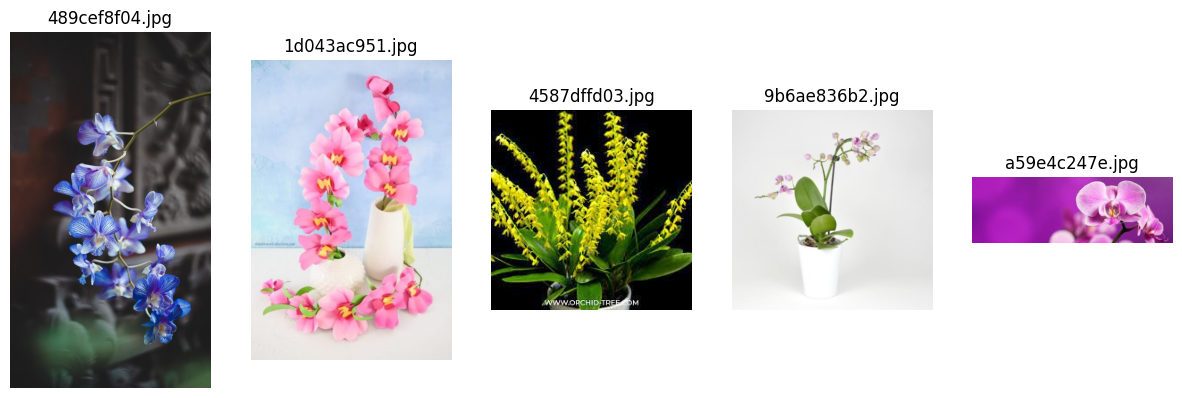

In [3]:
print(f"Dataset downloaded to: {dataset_path}")

# List files in the dataset directory and its subdirectories
image_files = []
for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            image_files.append(os.path.join(root, file))

# Define the local image directory
local_image_dir = "first_5_flower_images"

# Create the local image directory if it doesn't exist
os.makedirs(local_image_dir, exist_ok=True)

# Copy the first 5 images to the local directory
num_images_to_copy = 5
copied_files = []
if len(image_files) == 0:
    print("No image files found in the dataset.")
else:
    print(f"Found {len(image_files)} image files. Copying the first {min(num_images_to_copy, len(image_files))} to '{local_image_dir}':")
    for i in range(min(num_images_to_copy, len(image_files))):
        src_path = image_files[i]
        dest_path = os.path.join(local_image_dir, os.path.basename(src_path))
        shutil.copy(src_path, dest_path)
        copied_files.append(dest_path)
        print(f"Copied: {os.path.basename(src_path)}")

    # Display the copied images
    if len(copied_files) > 0:
        print(f"\nDisplaying the {len(copied_files)} copied image files:")
        plt.figure(figsize=(15, 5))
        for i in range(len(copied_files)):
            img_path = copied_files[i]
            img = mpimg.imread(img_path)
            plt.subplot(1, len(copied_files), i + 1)
            plt.imshow(img)
            plt.title(os.path.basename(img_path)) # Use filename as title
            plt.axis('off')
        plt.show()
    else:
        print("No files were copied.")

Procesando la imagen: 9b6ae836b2.jpg


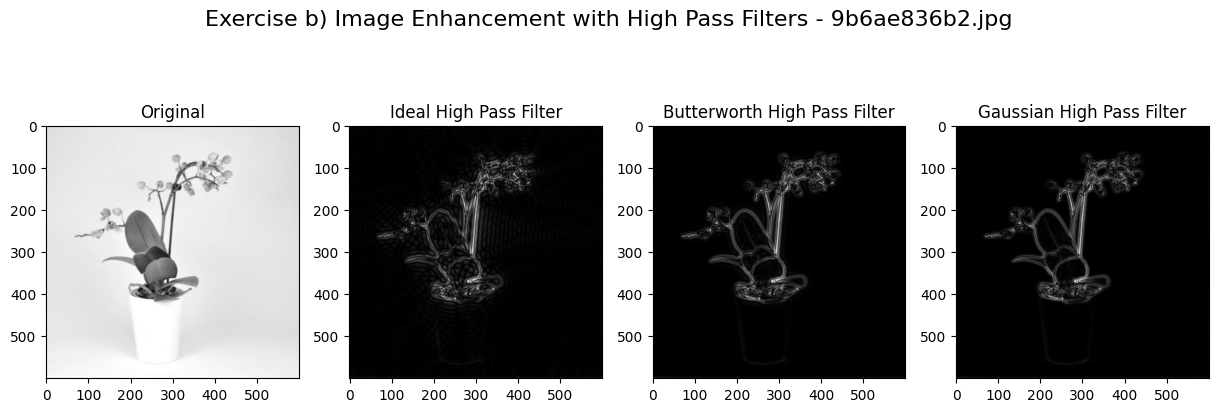

Procesando la imagen: 489cef8f04.jpg


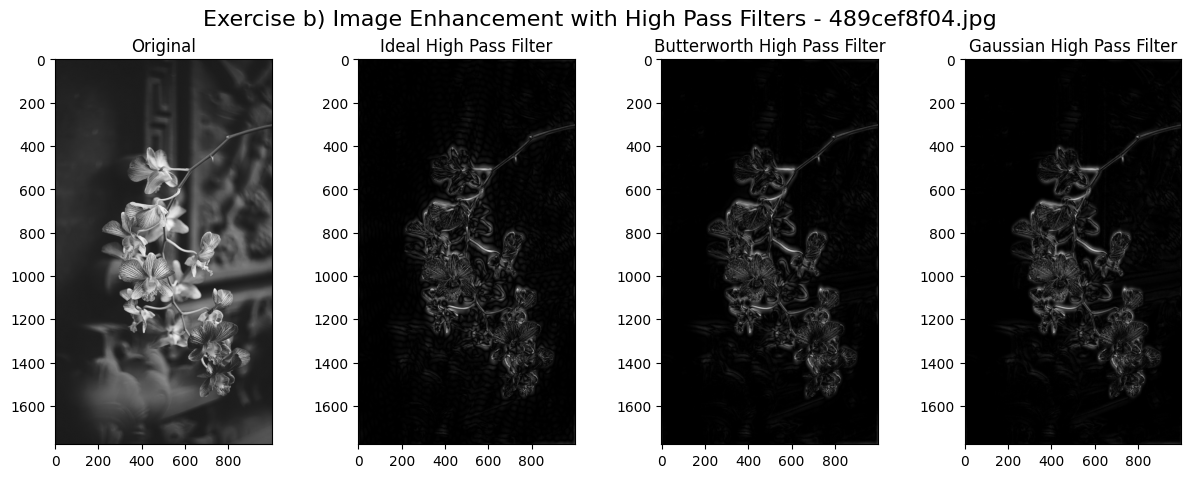

Procesando la imagen: 4587dffd03.jpg


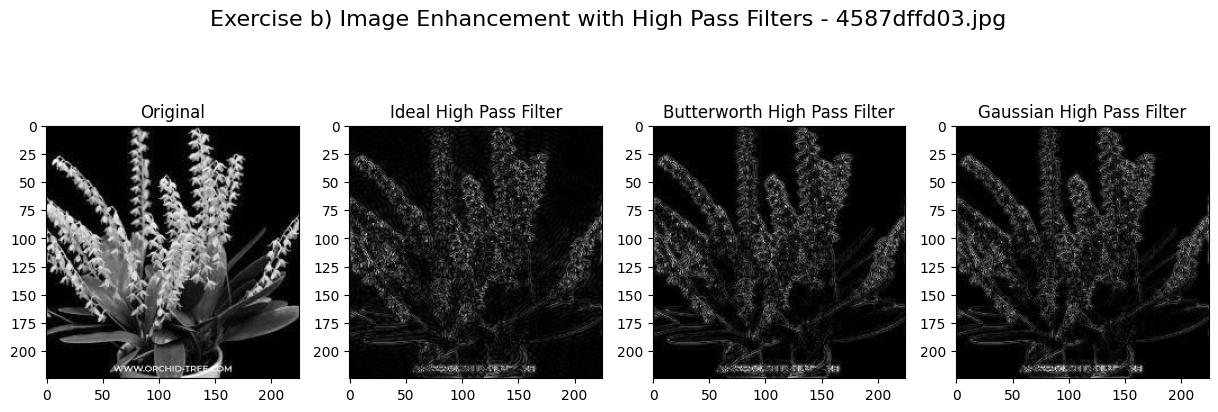

Procesando la imagen: a59e4c247e.jpg


Procesando la imagen: 1d043ac951.jpg


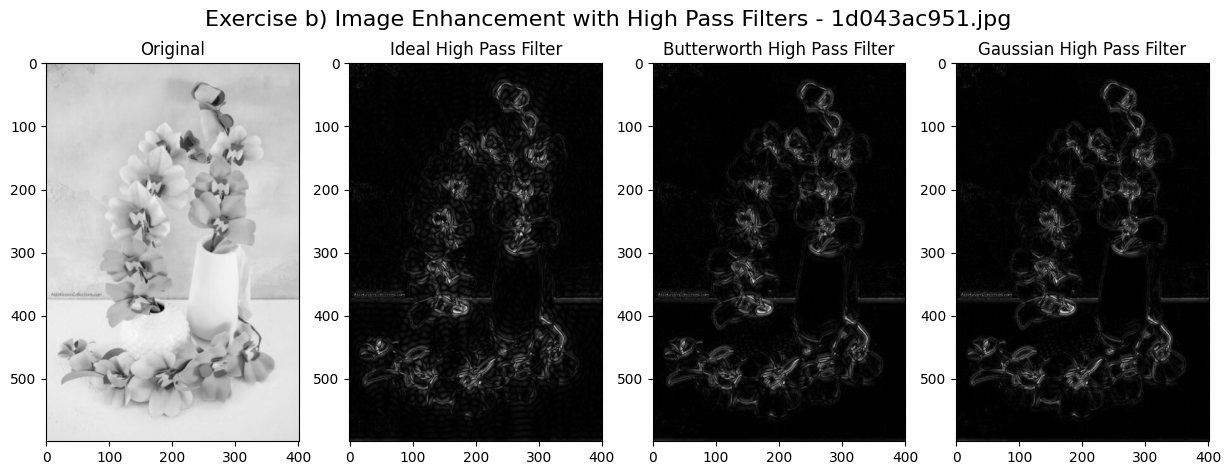

In [4]:
local_image_dir = "first_5_flower_images"

local_image_files = [os.path.join(local_image_dir, f) for f in os.listdir(local_image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

if not local_image_files:
    print("No se encontraron imágenes en el directorio. Asegúrate de que las imágenes estén en la carpeta 'first_5_flower_images'.")
else:

    for img_path in local_image_files:
        print(f"Procesando la imagen: {os.path.basename(img_path)}")


        image_color = cv2.imread(img_path)
        image = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)


        img_float = np.float64(image)


        f = np.fft.fft2(img_float)
        fshift = np.fft.fftshift(f)


        rows, cols = image.shape
        crow, ccol = rows // 2, cols // 2

        # =========================================================================
        # Exercise b) Image Enhancement with High Pass Filters
        # =========================================================================

        D0 = 30  # Frecuencia de corte
        n = 2    # Orden para el filtro Butterworth

        def ideal_highpass_filter(shape, D0):
            P, Q = shape
            H = np.ones((P, Q))
            for u in range(P):
                for v in range(Q):
                    D_uv = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
                    if D_uv <= D0:
                        H[u, v] = 0
            return H

        def butterworth_highpass_filter(shape, D0, n):
            P, Q = shape
            H = np.zeros((P, Q))
            for u in range(P):
                for v in range(Q):
                    D_uv = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
                    H[u, v] = 1 / (1 + (D0 / D_uv)**(2 * n)) if D_uv != 0 else 0
            return H

        def gaussian_highpass_filter(shape, D0):
            P, Q = shape
            H = np.zeros((P, Q))
            for u in range(P):
                for v in range(Q):
                    D_uv = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
                    H[u, v] = 1 - np.exp(-(D_uv**2) / (2 * D0**2))
            return H



        IHPF = ideal_highpass_filter(image.shape, D0)
        BHPF = butterworth_highpass_filter(image.shape, D0, n)
        GHPF = gaussian_highpass_filter(image.shape, D0)

        filtered_IHPF = fshift * IHPF
        filtered_BHPF = fshift * BHPF
        filtered_GHPF = fshift * GHPF

        f_ishift_IHPF = np.fft.ifftshift(filtered_IHPF)
        img_back_IHPF = np.fft.ifft2(f_ishift_IHPF)
        img_back_IHPF = np.abs(img_back_IHPF)

        f_ishift_BHPF = np.fft.ifftshift(filtered_BHPF)
        img_back_BHPF = np.fft.ifft2(f_ishift_BHPF)
        img_back_BHPF = np.abs(img_back_BHPF)

        f_ishift_GHPF = np.fft.ifftshift(filtered_GHPF)
        img_back_GHPF = np.fft.ifft2(f_ishift_GHPF)
        img_back_GHPF = np.abs(img_back_GHPF)


        # Resultados del realzado para la imagen actual
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 4, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
        plt.subplot(1, 4, 2), plt.imshow(img_back_IHPF, cmap='gray'), plt.title('Ideal High Pass Filter')
        plt.subplot(1, 4, 3), plt.imshow(img_back_BHPF, cmap='gray'), plt.title('Butterworth High Pass Filter')
        plt.subplot(1, 4, 4), plt.imshow(img_back_GHPF, cmap='gray'), plt.title('Gaussian High Pass Filter')
        plt.suptitle(f'Exercise b) Image Enhancement with High Pass Filters - {os.path.basename(img_path)}', fontsize=16)
        plt.show()

### Discussion of Results

High-pass filtering enhances image edges and fine structural details by selectively amplifying high-frequency components while attenuating smooth, low-frequency areas. As observed in the results above, all three filters—Ideal, Butterworth, and Gaussian—achieve this effect but differ notably in transition behavior, artifact generation, and overall visual outcome.

- The **Ideal Highpass Filter (IHPF)** produces the most pronounced sharpening due to its abrupt frequency cutoff. This aggressiveness enhances fine textures and edge contrast effectively but also introduces noticeable ringing artifacts and halo effects around high-contrast boundaries. These oscillations stem from the Gibbs phenomenon associated with the filter’s discontinuous frequency response (Gonzalez & Woods, 2018). In the floral images, this effect is visible as periodic ripples around petals and stems, especially in regions with sharp tonal transitions.

- The **Butterworth Highpass Filter (BHPF)** offers a more balanced enhancement. Its adjustable order parameter $𝑛$ allows control over the sharpness of the cutoff, producing smoother transitions between low and high frequencies. In the results shown, the BHPF enhances the edges comparably to the IHPF but with reduced haloing and fewer oscillations, yielding a cleaner and more visually stable image. The preservation of mid-frequency detail also results in a more natural appearance. This property makes Butterworth filters suitable for practical applications such as industrial inspection, biomedical imaging, and document digitization, where clear yet artifact-free edge delineation is required.

- The **Gaussian Highpass Filter (GHPF)** demonstrates the smoothest transition among the three. Its frequency response ensures a gradual attenuation of low frequencies and complete elimination of discontinuities, effectively eliminating ringing. The enhancement it provides is subtle yet perceptually pleasing: textures appear crisp, and contours are clearly defined without introducing distortions or false edges. This behavior aligns with its theoretical advantage—Gaussian functions are infinitely differentiable, leading to the most stable spatial response. As such, Gaussian HPFs are favored in natural image enhancement, photography, and computer vision pipelines, where fidelity and edge continuity are essential.

Comparatively, the Ideal HPF emphasizes edges the most but introduces strong artifacts, the Butterworth HPF provides a compromise between sharpness and smoothness, and the Gaussian HPF produces the most natural enhancement with minimal distortion. The optimal choice depends on the application’s sensitivity to artifacts: for scientific visualization or aesthetic improvement, Gaussian HPFs are preferable, while for defect detection or morphological analysis, a tuned Butterworth filter may offer the best trade-off between detail and clarity.

In summary, these results confirm the complementary relationship between frequency-domain filter design and image quality outcomes. The smoothness of the filter’s frequency transition directly influences spatial-domain artifact suppression. Therefore, when designing high-pass filtering systems, selecting the appropriate cutoff frequency $𝐷_0$ and transition behavior is crucial for achieving controlled enhancement without compromising visual integrity.

## Referencias

- Capitulo 4. Digital Image Processing. R. Gonzalez & R. Woods. 4° Edition. Pearson.
- Makandar, A., & Halalli, B. (2015). Image enhancement techniques using highpass and lowpass filters. International Journal of Computer Applications, 109(14).
- Image Enhancement: Filtering in the Frequency Domain (2013). Lecture slides, Digital Image Processing course. (Slides for frequency-domain filtering; provided context on filtering steps and examples of different $D_0$ values).
- Bobick, A. (n.d.). Frequency and Fourier Transforms (CS4495 Computer Vision Lecture Notes). Georgia Tech. (Lecture notes on Fourier analysis; helped reinforce concepts like convolution theorem and low-pass filtering effect).
- Levy, M. M. (1946). Fourier transform analysis. Journal of the British Institution of Radio Engineers, 6(6), 228-246.
- Costen, N. P., Parker, D. M., & Craw, I. (1996). Effects of high-pass and low-pass spatial filtering on face identification. Perception & psychophysics, 58(4), 602-612.